# Solutions PS3
## Exercise 6.1
a. Estimate the minimum detectable effect for a two sided comparison of means with sample size of 440, standard deviation of 10.2, significance level of 0.05, and power of 80%. What happens to the MDE if you increase the sample size?

b. Estimate the statistical power for a two sided comparison of means test with significance level of 0.10, sample size of   20500, and standard deviation of 1010, and MDE of   250.    What happens to the statistical power if you increase the standard deviation?

c. Estimate the  required sample size for  significance level of 0.05, power of 80% standard deviation of 0.65 and MDE of  .03.  What happens to the required sample size when you increase the power?


### Answer Key
See the R code and output below. 

a. MDE=1.93 As you increase the sample size, the minimum detectible effect falls.

b. Power=100% Power decreases as you increase the standard deviation.

c. Sample Size=2158 (or 2159) Required sample size increases as you increase the required power.

In [1]:
power.t.test(n =NULL, delta = .03, sd = .65, sig.level = 0.05,
             power = 0.8,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)


     Two-sample t test power calculation 

              n = 7370.186
          delta = 0.03
             sd = 0.65
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


In [1]:
#part a
power.t.test(n =440, delta = NULL, sd = 10.2, sig.level = 0.05,
             power = 0.8,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)
##try different values of sample size to see change in MDE

#part b
power.t.test(n =20500, delta = 250, sd = 1010, sig.level = 0.1,
             power = NULL,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)
##try different values of SD to see change in power

#part c
power.t.test(n =NULL, delta = .03, sd = .65, sig.level = 0.5,
             power = 0.8,
             type = "two.sample",
             alternative = "two.sided",
             strict = FALSE)
##try different values of power to see change in sample size



     Two-sample t test power calculation 

              n = 440
          delta = 1.92873
             sd = 10.2
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 20500
          delta = 250
             sd = 1010
      sig.level = 0.1
          power = 1
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 2158.237
          delta = 0.03
             sd = 0.65
      sig.level = 0.5
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


## Exercise 7.1
a) Repeat what we did in Lab (Graph and Sharp RD regressions) for at least two separate versions, varying the choice for the values of Z we include in the sample (band size-- something other than +-200) in one version, and the bin size in another (something other than 10). Interpret the results of the graphs and regression. What effect do the selected bin and band size have on the results?

(b) In the above analysis, we compare household within treatment villages. Describe at least one reason we might be concerned that a comparison of households below and above the cutoff to identify the treatment effect of PROGRESA might lead to a biased result.

### Answer Key
a. In the output below, we reduce the bin size to 5.  Additional points on the graph due to the reduced bin size allow me to see increased granularity in the association between Z and enrollment rates.  However, it also adds additional noise because bins may contain very few observations, making it hard to see any shift at the treatment cutoff (where Z=0). Note that this will only affect the graph and not the regression output, because we use individual level data for the regressions. Regression output should be the same as in lab if the only thing changed is the bin size. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-200.00 -110.00  -45.00  -38.02   30.00  195.00 

Warning message:
“Removed 40 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 40 rows containing non-finite values (stat_smooth).”

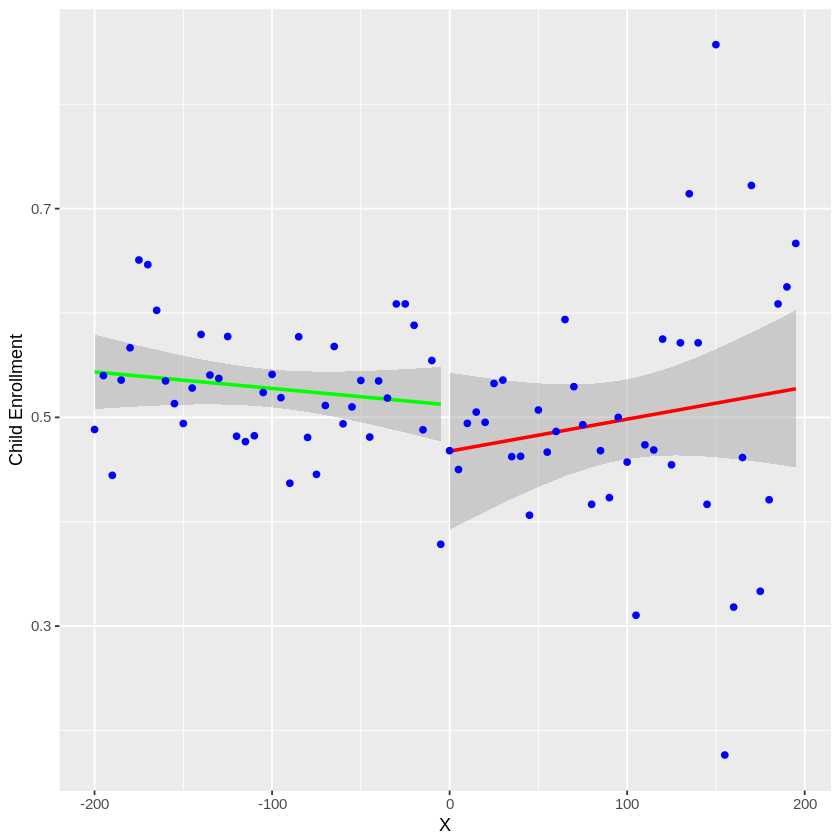

In [5]:
# Clear Environment 
rm(list = ls())
# Clear Console
cat('\014')

# Load required packages
require(dplyr)
require(ggplot2)
require(miceadds)
require(multiwayvcov)


# Set working directory to the location of your data files/
setwd("/home/jovyan/mba217-2/Data")

# Read the data 
# This is the same dataset we have been using, but with additional variables for the RD
# Data has already been limited to treatment group only in 1999 (endline)
PROGRESA_RD <- read.csv('PROGRESA_RD.csv')

#First we will limit the data households within 200 points of a poverty index cutoff 
# This cutoff determined assignment to treatment 
    sampleRD <- subset(PROGRESA_RD,  ( PROGRESA_RD$z>=-200 & PROGRESA_RD$z<=200) ) 

#Here, we create bins of 5 points on the poverty index
    sampleRD<-sampleRD[order(sampleRD$z),]
    sampleRD$bin<-cut_interval(sampleRD$z, length=5, labels = FALSE)
    sampleRD$bin<- -205+(sampleRD$bin*5)
    summary(sampleRD$bin)

#Make enroll_child factor variable and limit datset to only relevant variables
    sampleRD$enroll_child<-ifelse(sampleRD$enroll_child == "si" ,1,0)
    v<-c("bin", "z", "enroll_child")
    sampleRD2<-sampleRD[v]
    
    #collapse dataset to get bin means
    aggdata <-aggregate(sampleRD2, by=list(sampleRD2$bin), FUN=mean, na.rm=TRUE)

    #create separate variables for below and above cutoff
    aggdata$below<-aggdata$enroll_child
    aggdata$below[aggdata$bin>=0]<-NA
    aggdata$above<-aggdata$enroll_child
    aggdata$above[aggdata$bin<0]<-NA

    #Plot bin averages 
    L <- aggdata %>% ggplot(aes(bin, enroll_child)) 
    P <- geom_point(color='blue')
    ## add fit lines for above/below cutoff
    L <- L + geom_smooth(color='red',method='lm', formula=y~x, aes(aggdata$bin, aggdata$above))
    L <- L + geom_smooth(color='green',method='lm', formula=y~x, aes(aggdata$bin, aggdata$below))
    
    #Display Plot
    L+P + xlab("Z") +  ylab("Child Enrollment")

Next, we increase the bandwidth to +-300, which leads to more data on the tails of the graph.  We see that the trend line to the right of the cutoff seems strongly influenced by these new points, which may lead to concern that the new points introduce bias into our analysis around the cutoff.  However, more observations gives us a larger sample size/more statistical power.  When we include the quadratic control for Z in the regression on enrollment, the estimate of the treatment effect is a 0.05 (5%) increase in probability of enrollment, and it is significant at the 10% level.  Prior estimates of the treatment effect were not statistically significant.  The estimated treatment effect for the regression without the quadratic term is still not significant with the increased bandwidth.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-300.00 -140.00  -60.00  -53.96   20.00  270.00 

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 28 rows containing non-finite values (stat_smooth).”

R^2 = 0.00091 

                Estimate  Std. Error     t value      Pr(>|t|)
(Intercept) 4.978990e-01 0.018221608 27.32464409 2.161825e-164
pov_HH      3.209307e-02 0.025616873  1.25280976  2.102749e-01
z           1.403119e-06 0.000122078  0.01149363  9.908296e-01
R^2 = 0.00227 

                Estimate   Std. Error   t value      Pr(>|t|)
(Intercept) 4.746622e-01 2.128136e-02 22.304127 3.369469e-110
pov_HH      5.124436e-02 2.661984e-02  1.925044  5.422387e-02
z           1.548749e-04 1.418219e-04  1.092038  2.748163e-01
z2          1.193562e-06 5.618054e-07  2.124511  3.362744e-02


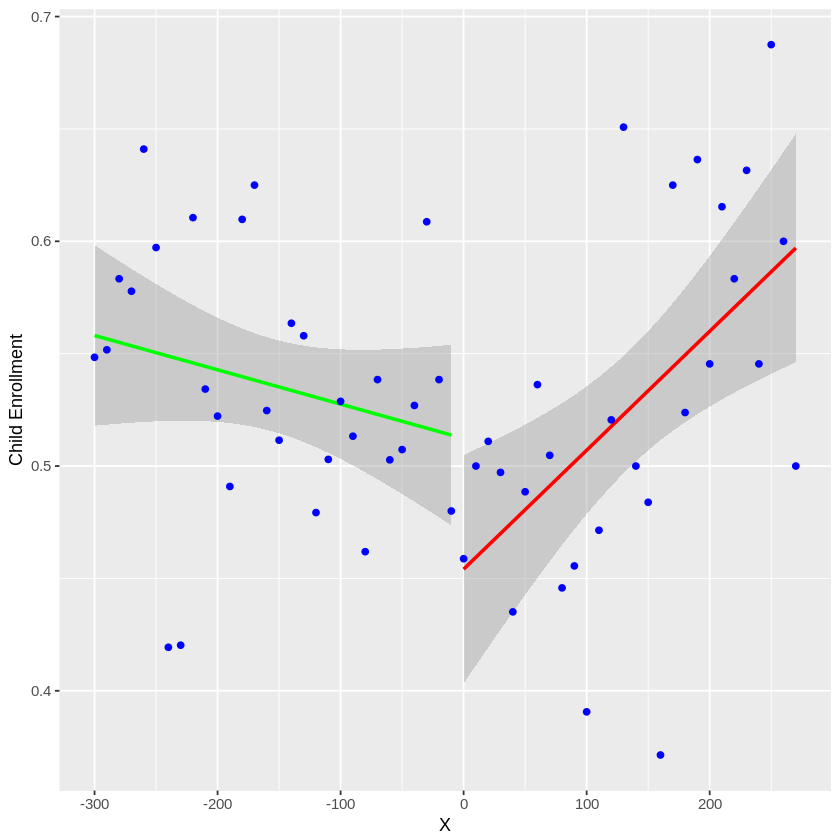

In [9]:

#First we will limit the data households within 300 points of a poverty index cutoff 
# This cutoff determined assignment to treatment 
    sampleRD <- subset(PROGRESA_RD,  ( PROGRESA_RD$z>=-300 & PROGRESA_RD$z<=300) ) 

#Here, we create bins of 10 points on the poverty index
    sampleRD<-sampleRD[order(sampleRD$z),]
    sampleRD$bin<-cut_interval(sampleRD$z, length=10, labels = FALSE)
    sampleRD$bin<- -310+(sampleRD$bin*10)
    summary(sampleRD$bin)


#Make enroll_child factor variable and limit datset to only relevant variables
    sampleRD$enroll_child<-ifelse(sampleRD$enroll_child == "si" ,1,0)
    v<-c("bin", "z", "enroll_child")
    sampleRD2<-sampleRD[v]
    
    #collapse dataset to get bin means
    aggdata <-aggregate(sampleRD2, by=list(sampleRD2$bin), FUN=mean, na.rm=TRUE)

    #create separate variables for below and above cutoff
    aggdata$below<-aggdata$enroll_child
    aggdata$below[aggdata$bin>=0]<-NA
    aggdata$above<-aggdata$enroll_child
    aggdata$above[aggdata$bin<0]<-NA

    #Plot bin averages 
    L <- aggdata %>% ggplot(aes(bin, enroll_child)) 
    P <- geom_point(color='blue')
    ## add fit lines for above/below cutoff
    L <- L + geom_smooth(color='red',method='lm', formula=y~x, aes(aggdata$bin, aggdata$above))
    L <- L + geom_smooth(color='green',method='lm', formula=y~x, aes(aggdata$bin, aggdata$below))
    
    #Display Plot
    L+P + xlab("Z") +  ylab("Child Enrollment")

     #Cluster at the village level and inlude a linear control for z
    #pov_HH=1 is the indicator for being below the cutoff
    model <- lm.cluster(data = sampleRD, formula= enroll_child ~ pov_HH+z, cluster=sampleRD$villid)
    summary(model)
    #next, try a quadratic control for z
    sampleRD$z2<-sampleRD$z^2
    model2 <- lm.cluster(data = sampleRD, formula= enroll_child ~ pov_HH+z+z2, cluster=sampleRD$villid)
    summary(model2)

b) We might be concerned that the RD analysis above would lead to a biased result if there was spillover to the control group within villages.  This could be possible if, for example, control households were often relatives of treated households and ended up receiving some of the cash transfers.  Additionally, anything that led households to select into being below the cutoff because they knew they would be eligible to receive PROGRESA would invalidate the approach.

## Exercise 8.1
Here, we will repeat the analysis above, but for a new outcome variable, Income_HH_per (income per household member).

(a)	Create histograms to see the distribution of income per household member by treatment and control in 2000 and then in 2003.  You will need to add "+ scale_x_continuous(limits = c(0, 5000))" to your ggplot code in order to restrict the range of the x-axis so you can better see the data. Compare and interpret the distributions in the pre and post period.  

(b)	Use a difference in differences regression model to estimate the average treatment effect on income per household member (use controls as above).  Interpret the results of the regression.


### Answer Key
a. See code and output below.  It is somewhat difficult to compare the distributions side to side, but it appears that the treatment group has lower income on average in the pre-period- a slightly higher proportion at 0 income and thinner distribution in the 2000+ range.  The treatment group remains lower in the post period, but it seems that both treatment and control had increases in income between pre and post.  We will need to do regression analysis to determine the exact treatment effect. (Note: any sensible explanation here is fine given graphs are difficult to read/compare)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1161 rows containing non-finite values (stat_bin).”

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1895 rows containing non-finite values (stat_bin).”

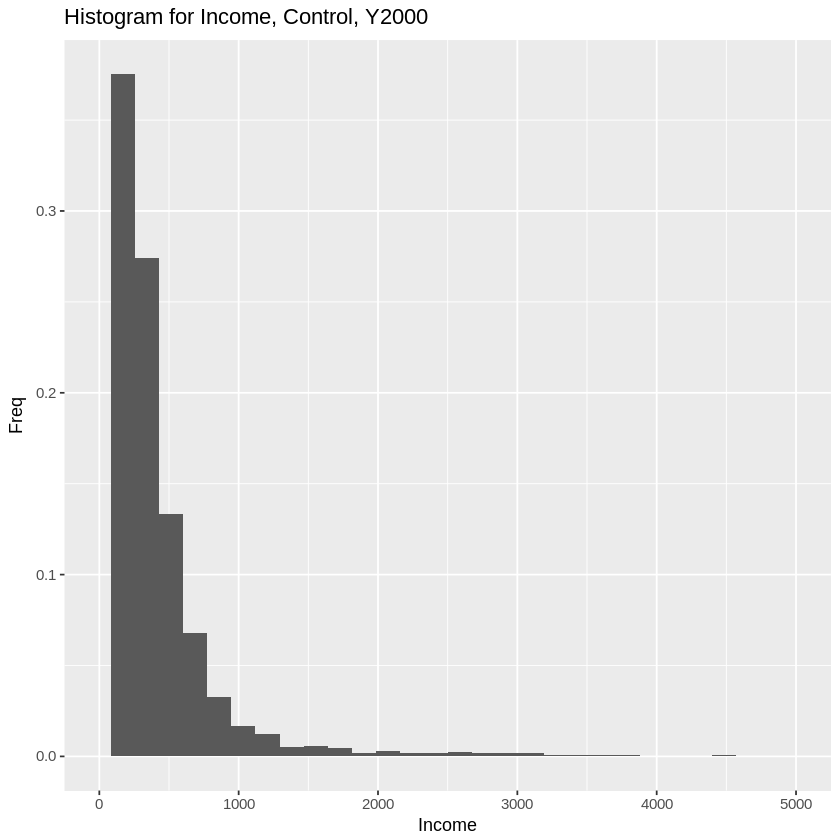

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4952 rows containing non-finite values (stat_bin).”

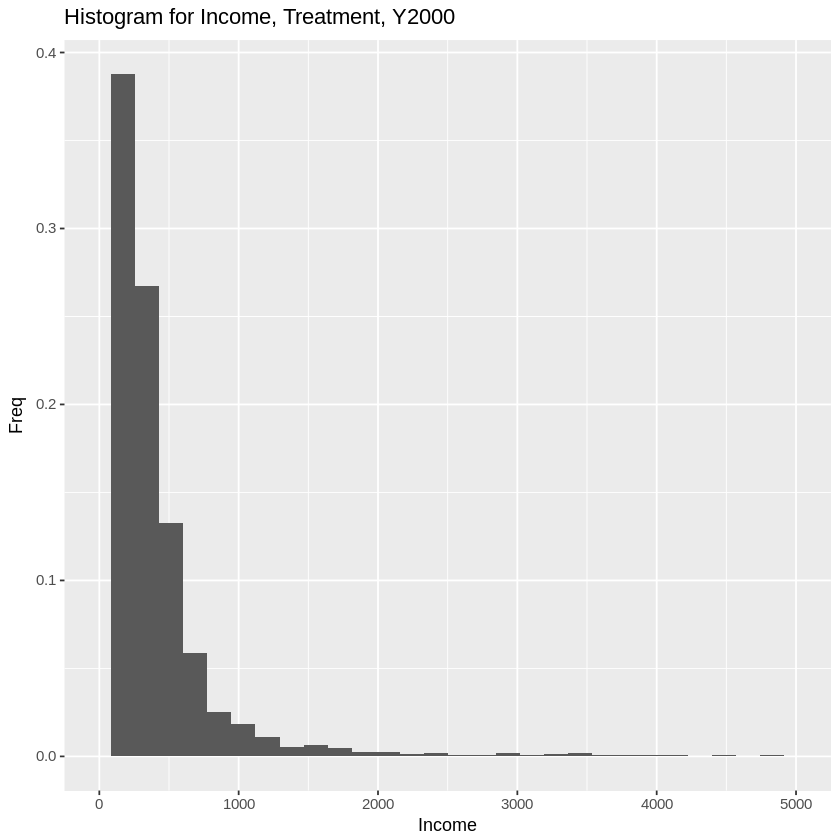

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 18969 rows containing non-finite values (stat_bin).”

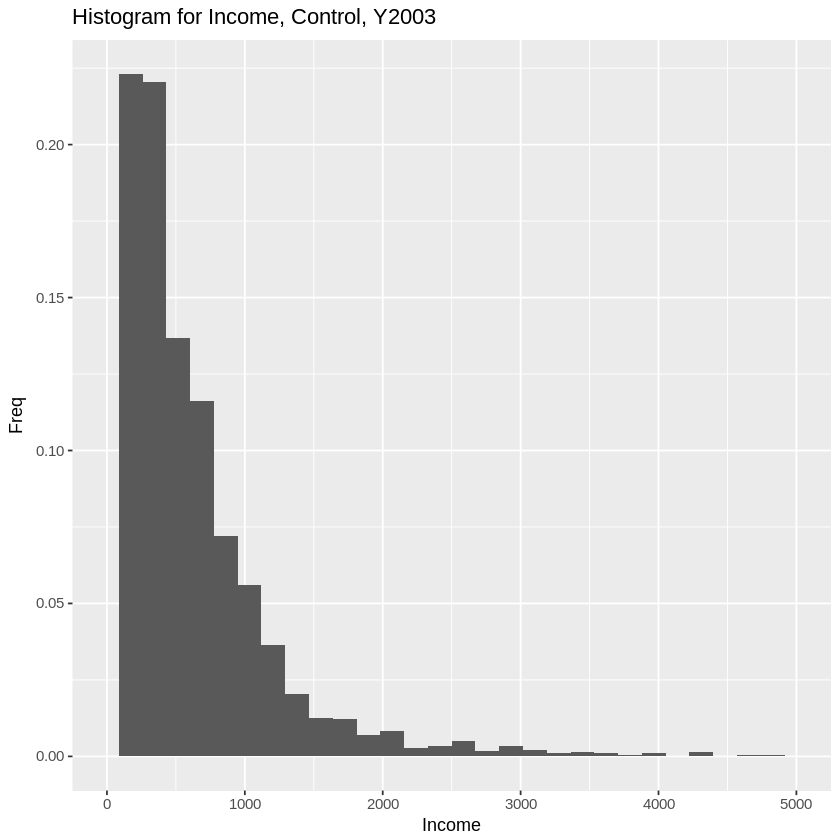

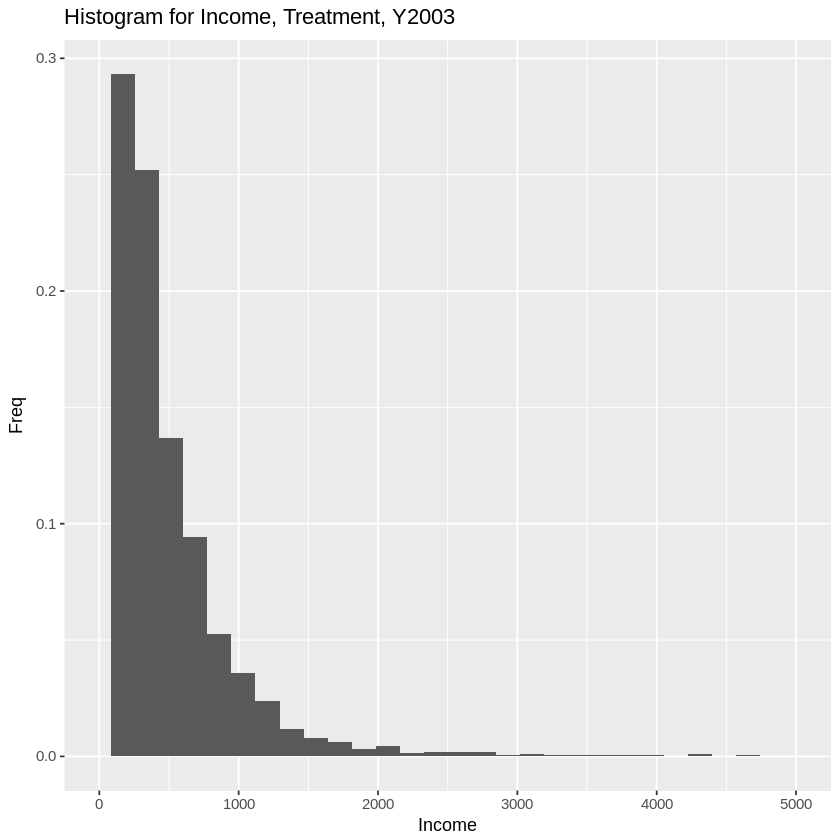

In [17]:
# Clear Environment 
rm(list = ls())
# Clear Console
cat('\014')

#load packages
require(foreign)
require(dplyr)
require(ggplot2)


# Set working directory to the location of your data files/
setwd("/home/jovyan/mba217-2/Data")

# Read the data 
Panel_Data <- read.csv("DID_OPORTUNIDADES.csv", header = TRUE)

# Graphical Analysis 
# Compare distribution at baseline year 2000
Panel_Data_2000_0 <- subset(Panel_Data, D=="Control" & year == 2000)
Panel_Data_2000_1 <- subset(Panel_Data, D=="Treated" & year == 2000)

# Calculating proportions between control and treatment for different Education
ggplot(data=Panel_Data_2000_0, aes(Panel_Data_2000_0$Income_HH_per)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Income, Control, Y2000") +
  labs(x="Income", y="Freq")  + scale_x_continuous(limits = c(0, 5000))

ggplot(data=Panel_Data_2000_1, aes(Panel_Data_2000_1$Income_HH_per)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Income, Treatment, Y2000") +
  labs(x="Income", y="Freq")  + scale_x_continuous(limits = c(0, 5000))

# Compare distribution at followup year 2003
Panel_Data_2003_0 <- subset(Panel_Data, D=="Control" & year == 2003)
Panel_Data_2003_1 <- subset(Panel_Data, D=="Treated" &  year == 2003)

# Calculating proportions between control and treatment for different Education
ggplot(data=Panel_Data_2003_0, aes(Panel_Data_2003_0$Income_HH_per)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Income, Control, Y2003") +
  labs(x="Income", y="Freq")  + scale_x_continuous(limits = c(0, 5000))

ggplot(data=Panel_Data_2003_1, aes(Panel_Data_2003_1$Income_HH_per)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Income, Treatment, Y2003") +
  labs(x="Income", y="Freq")  + scale_x_continuous(limits = c(0, 5000))


(b) See the code and output for the regression below. We interpret the coefficient on D_period as the treatment effect and find that the treatment increased income per household member by 315 pesos, which is statistically significant 

In [18]:
# Regression Model
# Recoding D to 0 and 1 for Control and Treated
Panel_Data$D <- ifelse(Panel_Data$D == "Control", 0, ifelse(Panel_Data$D == "Treated", 1, NA))
# Adding the interaction term 
Panel_Data$D_period <- Panel_Data$D * Panel_Data$period
# Adding Controls 
Panel_Data_model_wControls <- lm(Income_HH_per ~ D_period+D+period+age+sex+agehead+sexhead, data = Panel_Data)
summary(Panel_Data_model_wControls)


Call:
lm(formula = Income_HH_per ~ D_period + D + period + age + sex + 
    agehead + sexhead, data = Panel_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
  -1614    -467    -269     -24 2058993 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  713.815    116.006   6.153 7.60e-10 ***
D_period     314.897    121.437   2.593 0.009512 ** 
D           -460.915     85.295  -5.404 6.53e-08 ***
period      -390.843    101.437  -3.853 0.000117 ***
age            3.657      1.456   2.511 0.012026 *  
sex          -10.180     53.860  -0.189 0.850087    
agehead        6.136      2.130   2.881 0.003970 ** 
sexhead      -74.493     95.660  -0.779 0.436137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12850 on 228813 degrees of freedom
  (238017 observations deleted due to missingness)
Multiple R-squared:  0.0003363,	Adjusted R-squared:  0.0003057 
F-statistic:    11 on 7 and 228813 DF,  p-value: 5.741e-